## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [2]:
import tensorflow as tf

# YOUR CODE SHOULD START HERE
import matplotlib.pyplot as plt
import random

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get("acc") >= 0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True
# YOUR CODE SHOULD END HERE

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()


# YOUR CODE SHOULD START HERE
x_train = x_train /255.0
x_test = x_test /255.0
callbacks = myCallback()
# YOUR CODE SHOULD END HERE

model = tf.keras.models.Sequential([
# YOUR CODE SHOULD START HERE
tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.Dense(512, activation = tf.nn.relu),
tf.keras.layers.Dense(10, activation = tf.nn.softmax)
# YOUR CODE SHOULD END HERE
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# YOUR CODE SHOULD START HERE
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
# YOUR CODE SHOULD END HERE

W0707 18:33:25.819658 4756084160 deprecation.py:506] From /anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.1994 - acc: 0.9417
Epoch 2/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0801 - acc: 0.9754
Epoch 3/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0517 - acc: 0.9840
Epoch 4/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0362 - acc: 0.9885
Epoch 5/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.0280 - acc: 0.9909
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0280 - acc: 0.9909


In [3]:
# test 
model.evaluate(x_test, y_test)
classifications = model.predict(x_test)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.0813 - acc: 0.9749


[9.9999940e-01 1.8486765e-13 2.0381536e-07 3.6392411e-13 5.6389297e-14
 3.3196286e-12 2.0288413e-09 8.0777847e-09 8.0541913e-11 4.0250708e-07]

The prediction is  0


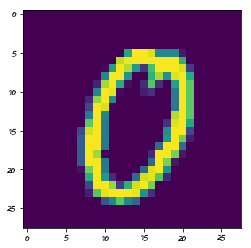

In [4]:
%matplotlib inline
# show
index = random.randint(0,9999)
print(classifications[index])
print("\nThe prediction is ",y_test[index])

plt.imshow(x_test[index])
plt.show()

In [5]:
help(tf.keras.layers.Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(16,)))
 |  # now the model will take as input arrays of shape (*, 16)
 |  # and output arrays of shape (*, 32)
 |  
 |  # after the first layer, you don't need to specify
 |  # the size 